In [115]:
import pandas as pd

In [116]:
df = pd.read_csv('student_productivity.csv')

In [117]:
df.head()

,student_id,age,gender,academic_level,study_hours,self_study_hours,online_classes_hours,social_media_hours,gaming_hours,sleep_hours,...,exercise_minutes,caffeine_intake_mg,part_time_job,upcoming_deadline,internet_quality,mental_health_score,focus_index,burnout_level,productivity_score,exam_score
0,1,18,Other,High School,7.64,1.56,2.20,3.05,2.19,6.52,...,81,38,1,0,Good,10,43.05,31.77,73.65,50.16
1,2,18,Other,High School,2.21,2.22,2.10,1.65,2.55,5.97,...,111,339,0,0,Good,3,15.92,37.00,13.70,1.00
2,3,22,Male,High School,3.45,0.00,0.29,1.34,2.08,8.39,...,68,266,0,1,Good,8,27.39,34.37,45.15,18.30
3,4,17,Other,High School,5.75,2.08,3.01,2.27,2.20,6.31,...,113,480,1,1,Poor,3,22.31,77.31,20.92,9.37
4,5,19,Other,High School,6.83,1.72,3.33,2.65,0.70,8.01,...,121,24,1,0,Good,8,38.11,39.53,59.23,27.81


In [118]:
df.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')

In [119]:
# 특성 : sleep_hours, self_study_hours, exercise_minutes
# 결과 : exam_score

In [120]:
student_input = df[['sleep_hours', 'self_study_hours', 'exercise_minutes']].to_numpy()
print(student_input)

[[  6.52   1.56  81.  ]
 [  5.97   2.22 111.  ]
 [  8.39   0.    68.  ]
 ...
 [  6.65   2.52 123.  ]
 [  7.36   2.83  54.  ]
 [  6.38   4.14  24.  ]]


In [121]:
student_target = df['exam_score'].to_numpy()
print(student_target)

[50.16  1.   18.3  ... 27.89  3.63 10.76]


In [122]:
print(len(student_input))

5000


In [123]:
student_sleep_hours = df['sleep_hours'].to_numpy()
print(student_sleep_hours)

student_sleep_hours = student_sleep_hours.reshape(-1, 1)

[6.52 5.97 8.39 ... 6.65 7.36 6.38]


In [124]:
# 잠자는 시간을 통해 성적이 어떻게 나오는지 확인
student_exam_score = df['exam_score'].to_numpy()
print(student_exam_score)

student_exam_score = student_exam_score

[50.16  1.   18.3  ... 27.89  3.63 10.76]


In [125]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(student_sleep_hours, student_exam_score, random_state=42)

In [126]:
# 선형 회귀를 통해 추정
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))

0.05974081984969726


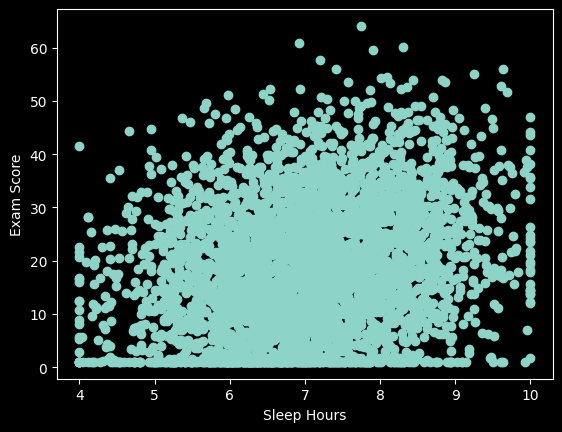

In [127]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

In [128]:
# 수면 시간에 따른 성적의 분포는 선형적이지 않은 것 같음
print(df.columns)

Index(['student_id', 'age', 'gender', 'academic_level', 'study_hours',
       'self_study_hours', 'online_classes_hours', 'social_media_hours',
       'gaming_hours', 'sleep_hours', 'screen_time_hours', 'exercise_minutes',
       'caffeine_intake_mg', 'part_time_job', 'upcoming_deadline',
       'internet_quality', 'mental_health_score', 'focus_index',
       'burnout_level', 'productivity_score', 'exam_score'],
      dtype='object')


In [129]:
self_study_hours = df['self_study_hours'].to_numpy().reshape(-1, 1)

In [130]:
self_study_train_input, self_study_test_input, self_study_train_target, self_study_test_target = train_test_split(
    self_study_hours, student_exam_score, random_state=42
)

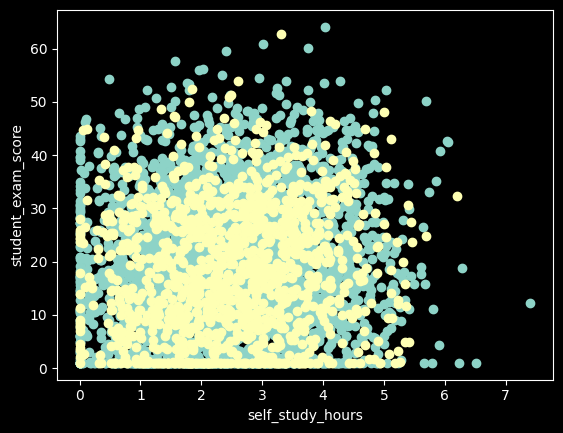

In [131]:
plt.scatter(self_study_train_input, self_study_train_target)
plt.scatter(self_study_test_input, self_study_test_target)
plt.xlabel('self_study_hours')
plt.ylabel('student_exam_score')
plt.show()

In [132]:
data = df[['age', 'self_study_hours', 'study_hours', 'online_classes_hours', 'sleep_hours']].to_numpy()
print(data)
print(data.shape)

[[18.    1.56  7.64  2.2   6.52]
 [18.    2.22  2.21  2.1   5.97]
 [22.    0.    3.45  0.29  8.39]
 ...
 [22.    2.52  5.63  2.89  6.65]
 [17.    2.83  3.58  1.53  7.36]
 [22.    4.14  5.6   2.17  6.38]]
(5000, 5)


In [133]:
train_input, test_input, train_target, test_target = train_test_split(
    data, student_exam_score, random_state=42
)
print(train_input.shape, test_input.shape)

(3750, 5) (1250, 5)


In [134]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[-1.58285506 -0.98346231 -0.28799029 -0.27210777 -0.24393653]
 [-0.88169075 -0.79686853  0.79362591  1.87470442  0.08101725]
 [-0.53110859  0.85703089  1.21089917  1.12534545 -1.10762947]
 [-1.58285506 -0.23708719 -0.06288235 -0.72779904  1.73144039]
 [ 0.17005572  0.29724955  0.10183078 -1.06197263 -0.2268337 ]]


In [135]:
print(train_scaled.shape)
print(train_target.shape)

(3750, 5)
(3750,)


In [136]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors=15)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.36834118098863344
0.2551096499114631


In [137]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(max_iter=1000)
lr.fit(train_scaled, train_target)

C:\Users\thinkodia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
C:\Users\thinkodia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.
  wa

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

In [ ]:
sample = [[]]
ss.transform(sample)